In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zfrom sklearn.preprocessing import Stanscoreda
rdScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import fcluster
import warnings
warnings.filterwarnings('ignore')

## Problem 1: Linear Regression.

### The comp-activ databases is a collection of a computer systems activity measures .The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [2]:
comp = pd.read_excel('compactiv.xlsx')
comp.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [3]:
comp.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

In [4]:
comp.drop(['pgscan'], axis=1, inplace=True)

### Exploratory Data Analysis (EDA)

In [5]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  atch      8192 non-null   float64
 13  pgin      8192 non-null   float64
 14  ppgin     8192 non-null   float64
 15  pflt      8192 non-null   float64
 16  vflt      8192 non-null   float64
 17  runqsz    8192 non-null   object 
 18  freemem   8192 non-null   int64  
 19  freeswap  8192 non-null   int64  
 20  usr       8192 non-null   int6

In [6]:
comp.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [7]:
comp.dtypes

lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object

In [8]:
comp.shape

(8192, 21)

In [9]:
comp.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [10]:
comp.duplicated().sum()

0

### Univariate Analysis and Bivariate Analysis Using Histogram and Boxplot of 21 Variables.

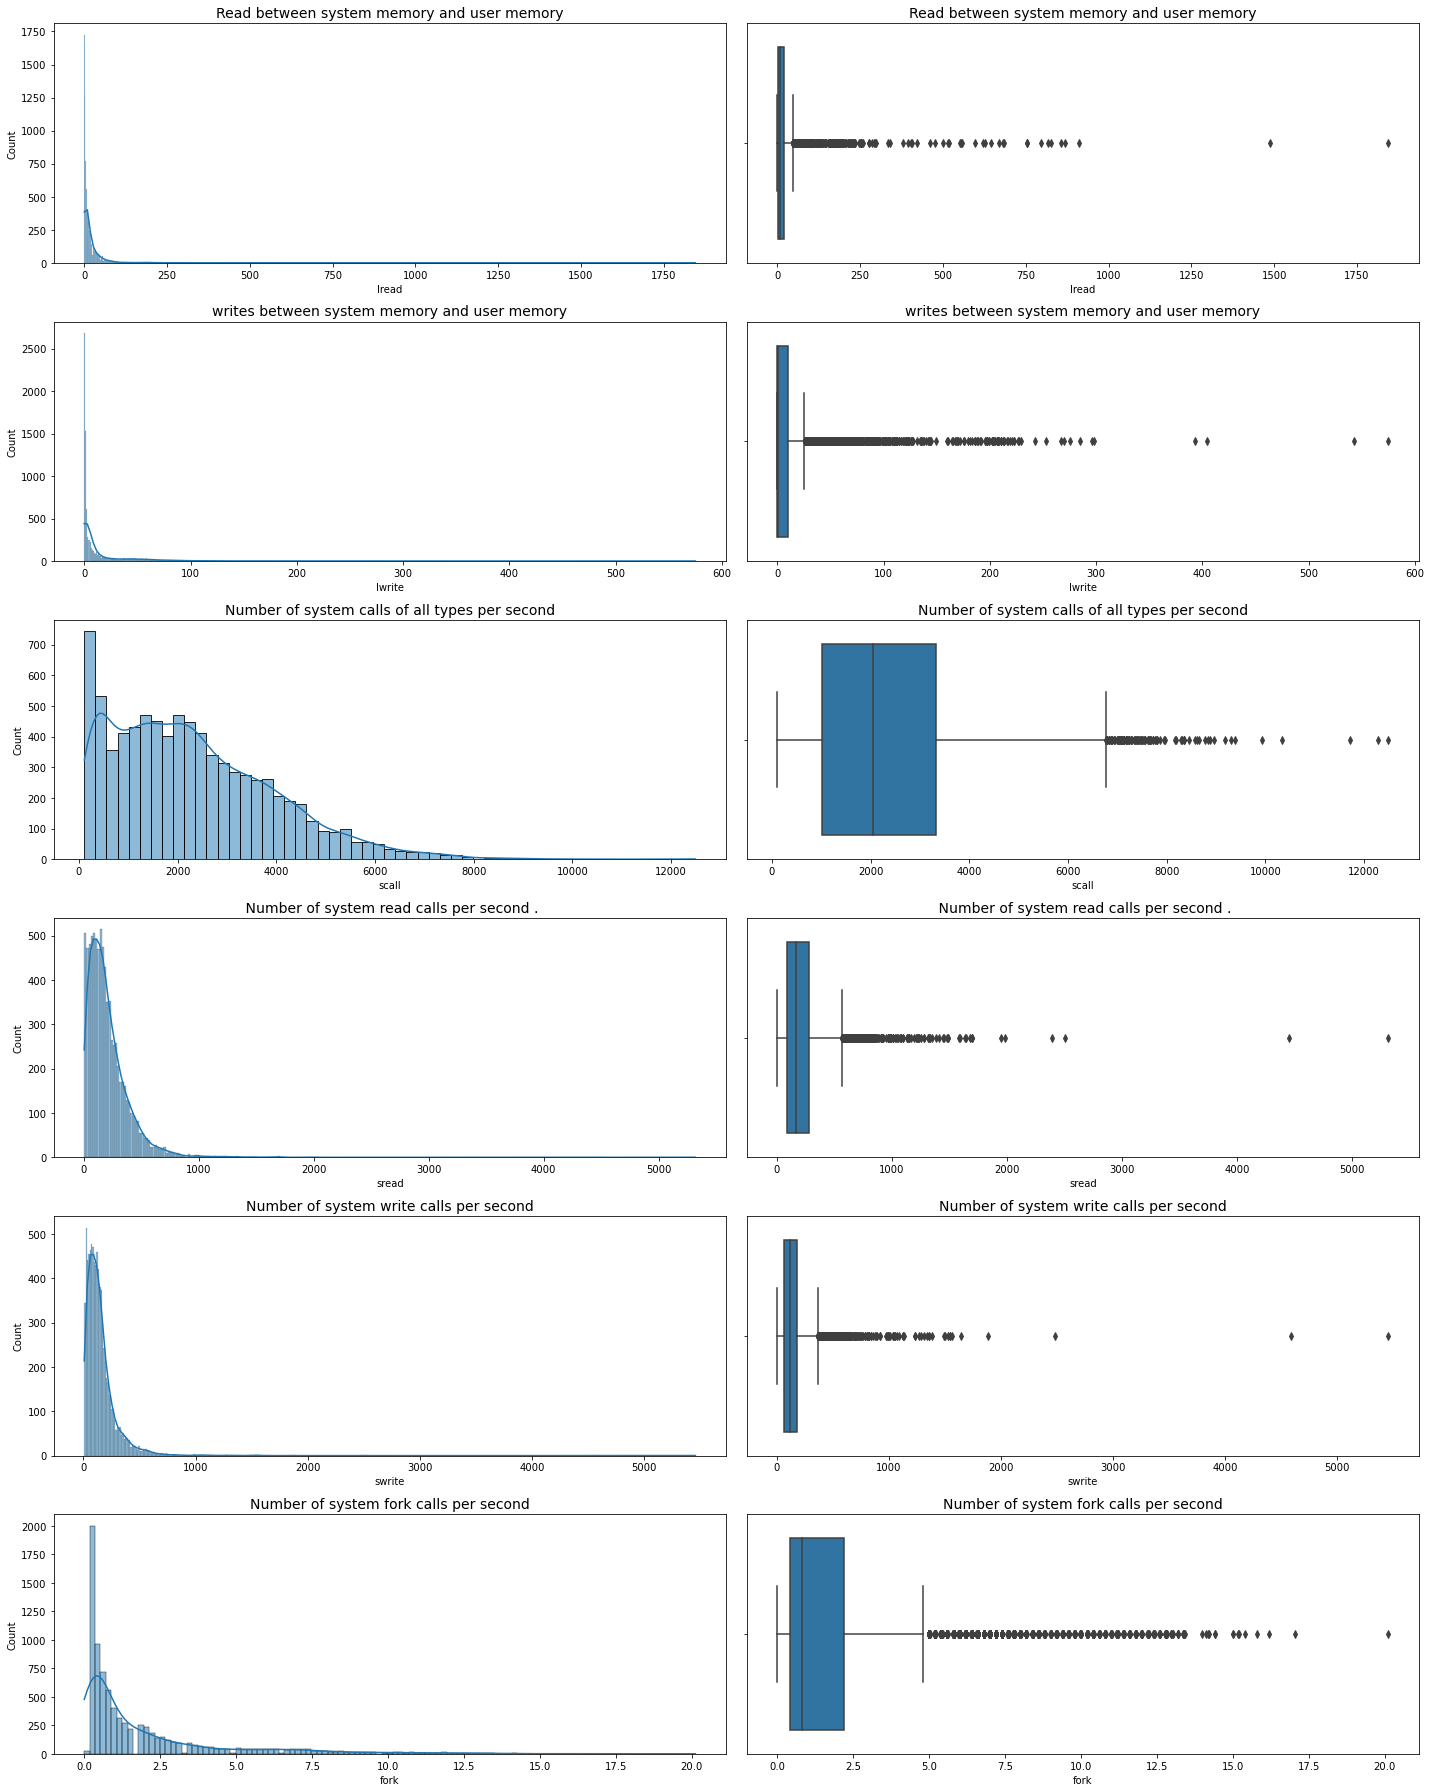

In [11]:
fig, axes = plt.subplots(6, 2, figsize=(20,25));

plot= sns.histplot(x='lread', data=comp, ax=axes[0][0], kde=True);
plot.set_title('Read between system memory and user memory', fontsize=14);
plot = sns.boxplot(x='lread', data=comp, ax=axes[0][1]);
plot.set_title('Read between system memory and user memory', fontsize=14);

plot= sns.histplot(x='lwrite', data=comp, ax=axes[1][0], kde=True);
plot.set_title('writes between system memory and user memory', fontsize=14);
plot = sns.boxplot(x='lwrite', data=comp, ax=axes[1][1]);
plot.set_title('writes between system memory and user memory', fontsize=14);

plot= sns.histplot(x='scall', data=comp, ax=axes[2][0], kde=True);
plot.set_title('Number of system calls of all types per second', fontsize=14);
plot = sns.boxplot(x='scall', data=comp, ax=axes[2][1]);
plot.set_title('Number of system calls of all types per second', fontsize=14);

plot= sns.histplot(x='sread', data=comp, ax=axes[3][0], kde=True);
plot.set_title(' Number of system read calls per second .', fontsize=14);
plot = sns.boxplot(x='sread', data=comp, ax=axes[3][1]);
plot.set_title(' Number of system read calls per second .', fontsize=14);

plot= sns.histplot(x='swrite', data=comp, ax=axes[4][0], kde=True);
plot.set_title('Number of system write calls per second', fontsize=14);
plot = sns.boxplot(x='swrite', data=comp, ax=axes[4][1]);
plot.set_title('Number of system write calls per second', fontsize=14);

plot= sns.histplot(x='fork', data=comp, ax=axes[5][0], kde=True);
plot.set_title('Number of system fork calls per second', fontsize=14);
plot = sns.boxplot(x='fork', data=comp, ax=axes[5][1]);
plot.set_title('Number of system fork calls per second', fontsize=14);

plt.tight_layout();

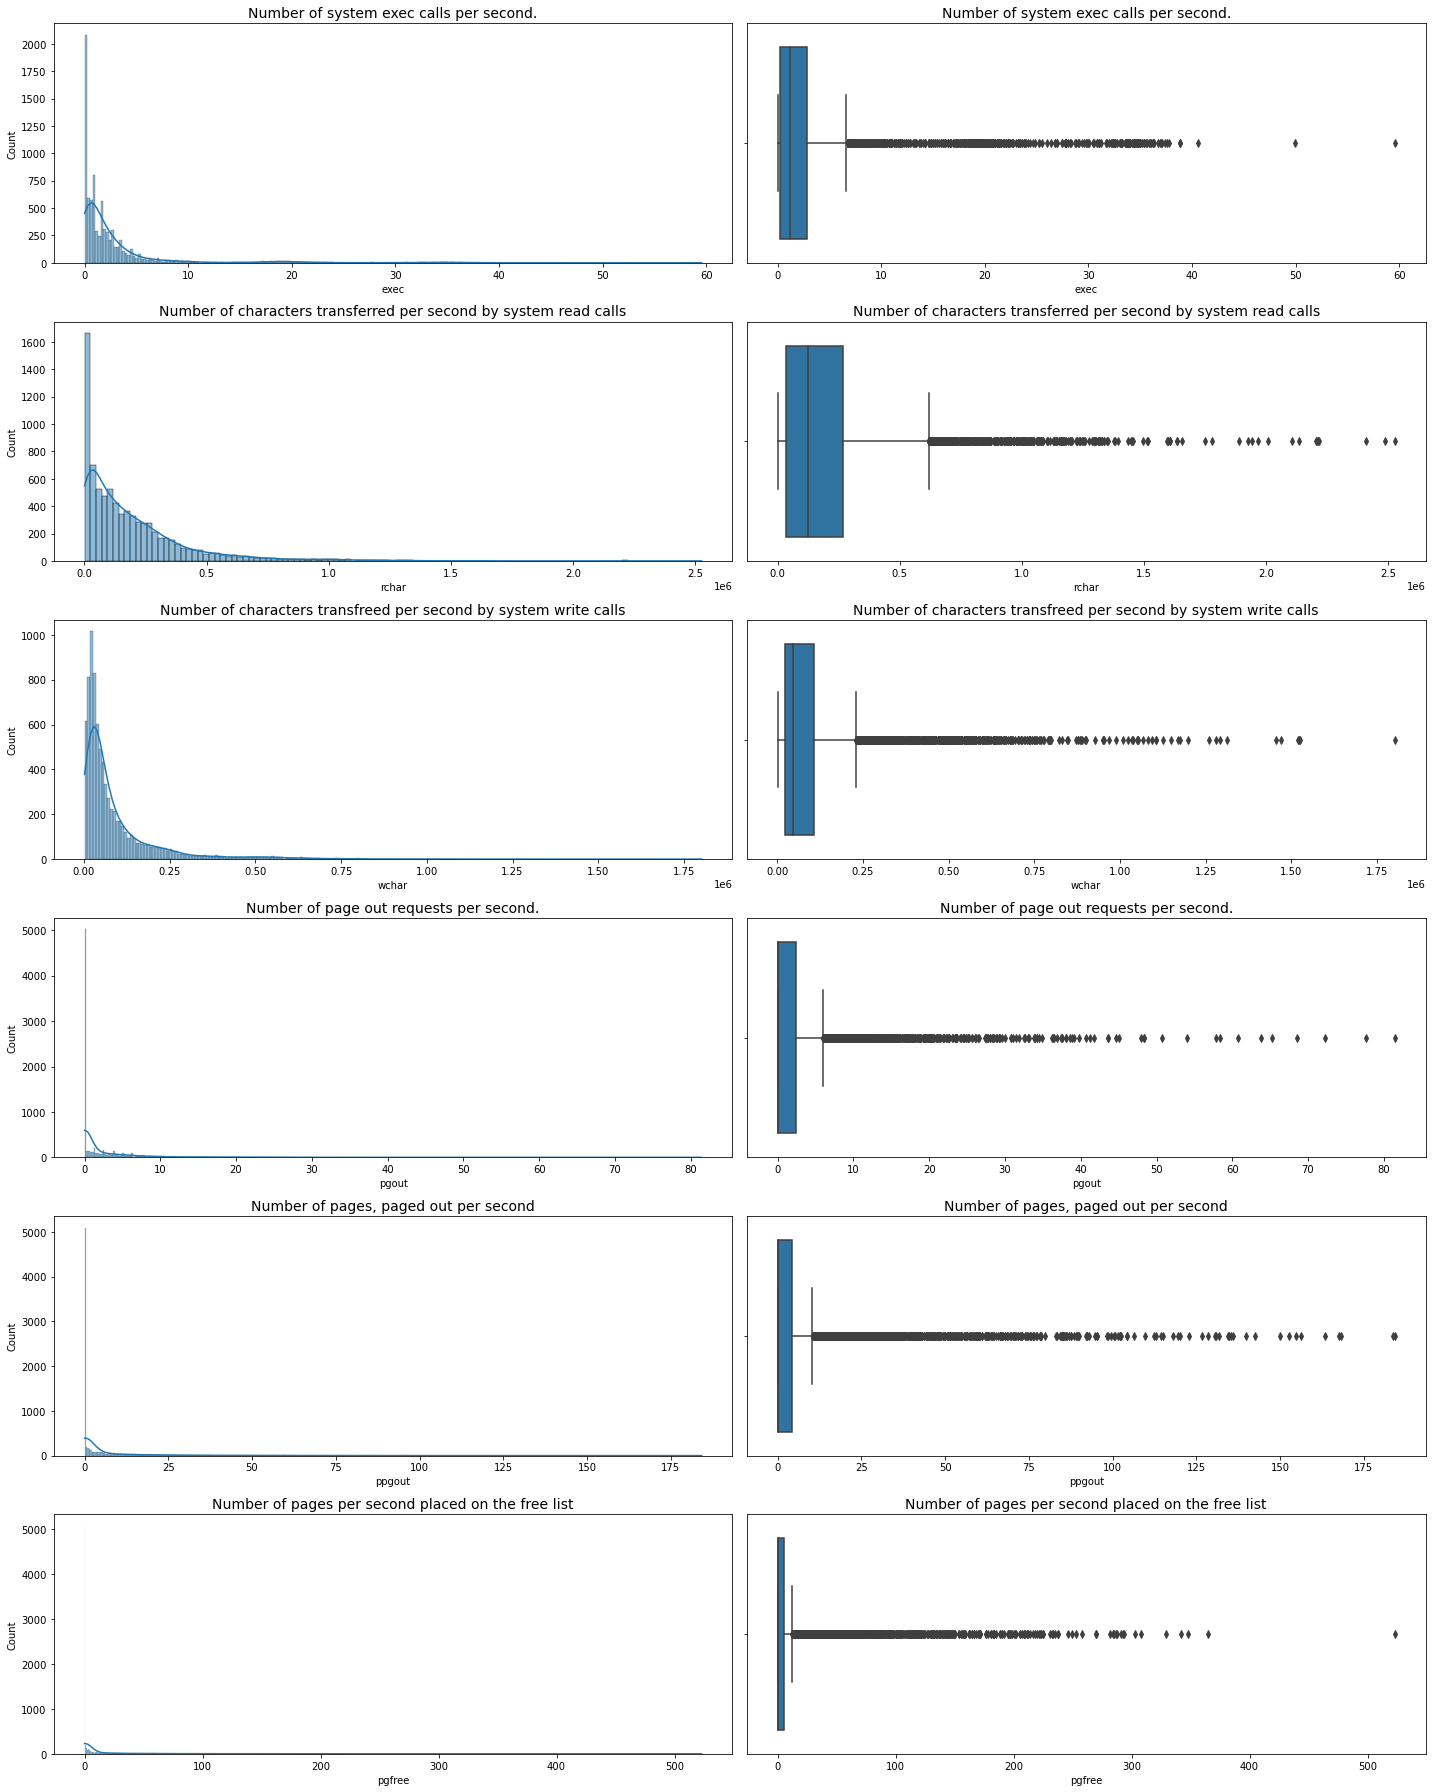

In [12]:
fig, axes = plt.subplots(6, 2, figsize=(20,25));

plot= sns.histplot(x='exec', data=comp, ax=axes[0][0], kde=True);
plot.set_title('Number of system exec calls per second.', fontsize=14);
plot = sns.boxplot(x='exec', data=comp, ax=axes[0][1]);
plot.set_title('Number of system exec calls per second.', fontsize=14);

plot= sns.histplot(x='rchar', data=comp, ax=axes[1][0], kde=True);
plot.set_title('Number of characters transferred per second by system read calls', fontsize=14);
plot = sns.boxplot(x='rchar', data=comp, ax=axes[1][1]);
plot.set_title('Number of characters transferred per second by system read calls', fontsize=14);

plot= sns.histplot(x='wchar', data=comp, ax=axes[2][0], kde=True);
plot.set_title('Number of characters transfreed per second by system write calls', fontsize=14);
plot = sns.boxplot(x='wchar', data=comp, ax=axes[2][1]);
plot.set_title('Number of characters transfreed per second by system write calls', fontsize=14);

plot= sns.histplot(x='pgout', data=comp, ax=axes[3][0], kde=True);
plot.set_title('Number of page out requests per second.', fontsize=14);
plot = sns.boxplot(x='pgout', data=comp, ax=axes[3][1]);
plot.set_title('Number of page out requests per second.', fontsize=14);

plot= sns.histplot(x='ppgout', data=comp, ax=axes[4][0], kde=True);
plot.set_title('Number of pages, paged out per second', fontsize=14);
plot = sns.boxplot(x='ppgout', data=comp, ax=axes[4][1]);
plot.set_title('Number of pages, paged out per second', fontsize=14);

plot= sns.histplot(x='pgfree', data=comp, ax=axes[5][0], kde=True);
plot.set_title('Number of pages per second placed on the free list', fontsize=14);
plot = sns.boxplot(x='pgfree', data=comp, ax=axes[5][1]);
plot.set_title('Number of pages per second placed on the free list', fontsize=14);

plt.tight_layout();

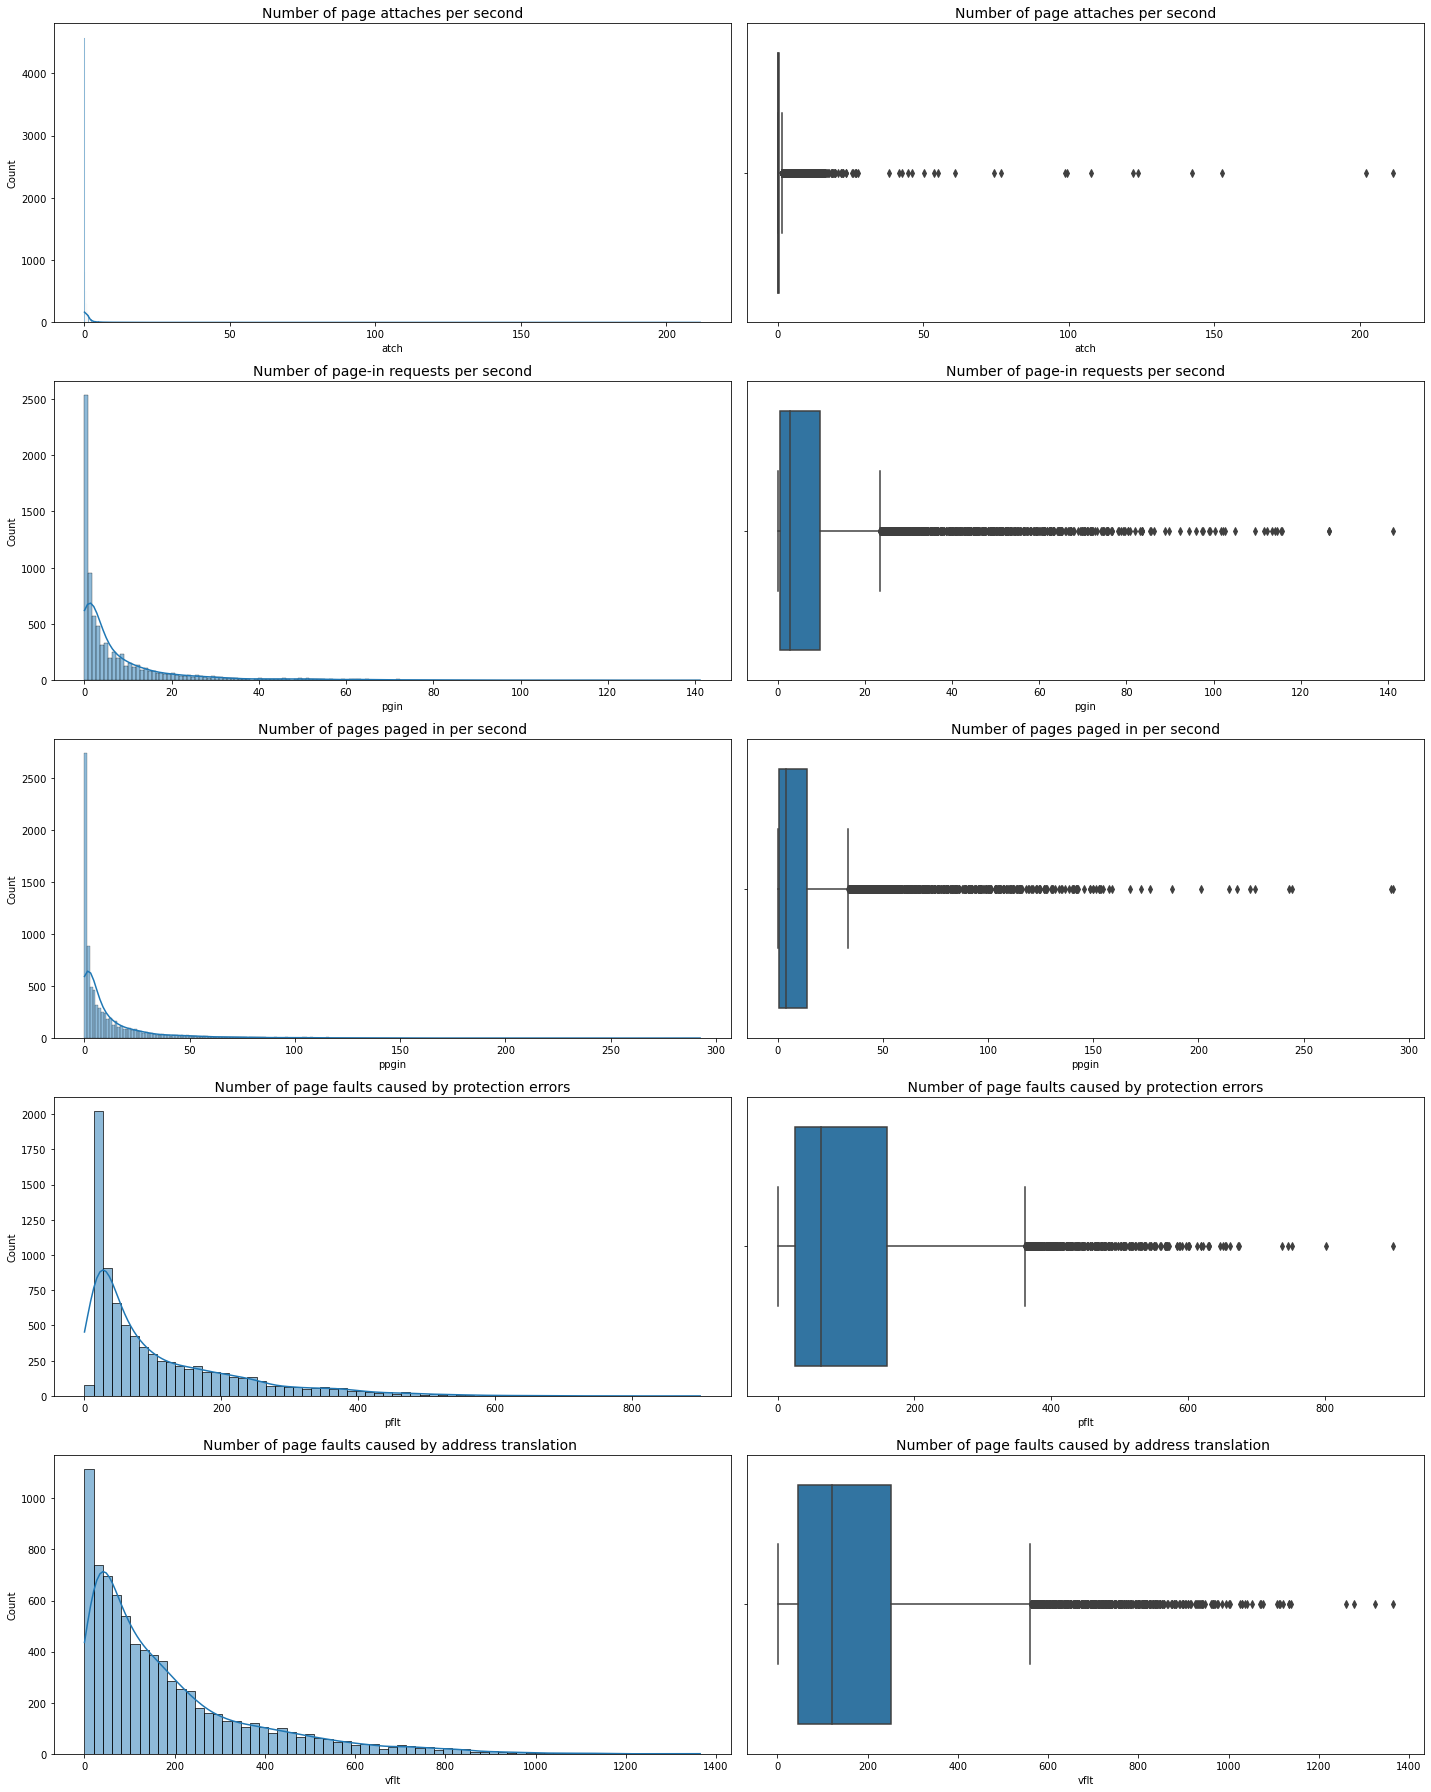

In [13]:
fig, axes = plt.subplots(5, 2, figsize=(20,25));

plot= sns.histplot(x='atch', data=comp, ax=axes[0][0], kde=True);
plot.set_title('Number of page attaches per second', fontsize=14);
plot = sns.boxplot(x='atch', data=comp, ax=axes[0][1]);
plot.set_title('Number of page attaches per second', fontsize=14);

plot= sns.histplot(x='pgin', data=comp, ax=axes[1][0], kde=True);
plot.set_title('Number of page-in requests per second', fontsize=14);
plot = sns.boxplot(x='pgin', data=comp, ax=axes[1][1]);
plot.set_title('Number of page-in requests per second', fontsize=14);

plot= sns.histplot(x='ppgin', data=comp, ax=axes[2][0], kde=True);
plot.set_title('Number of pages paged in per second', fontsize=14);
plot = sns.boxplot(x='ppgin', data=comp, ax=axes[2][1]);
plot.set_title('Number of pages paged in per second', fontsize=14);

plot= sns.histplot(x='pflt', data=comp, ax=axes[3][0], kde=True);
plot.set_title(' Number of page faults caused by protection errors ', fontsize=14);
plot = sns.boxplot(x='pflt', data=comp, ax=axes[3][1]);
plot.set_title(' Number of page faults caused by protection errors ', fontsize=14);

plot= sns.histplot(x='vflt', data=comp, ax=axes[4][0], kde=True);
plot.set_title('Number of page faults caused by address translation ', fontsize=14);
plot = sns.boxplot(x='vflt', data=comp, ax=axes[4][1]);
plot.set_title('Number of page faults caused by address translation ', fontsize=14);

plt.tight_layout();

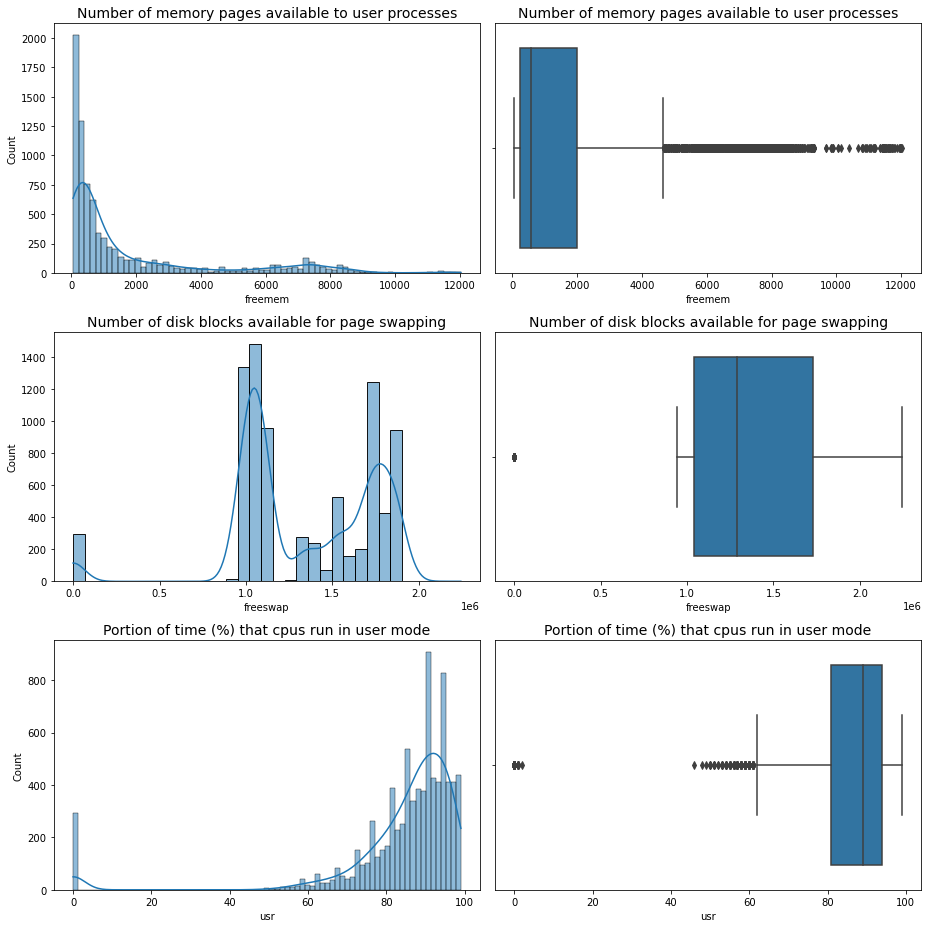

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(13,13));

plot= sns.histplot(x='freemem', data=comp, ax=axes[0][0], kde=True);
plot.set_title('Number of memory pages available to user processes', fontsize=14);
plot = sns.boxplot(x='freemem', data=comp, ax=axes[0][1]);
plot.set_title('Number of memory pages available to user processes', fontsize=14);

plot= sns.histplot(x='freeswap', data=comp, ax=axes[1][0], kde=True);
plot.set_title('Number of disk blocks available for page swapping', fontsize=14);
plot = sns.boxplot(x='freeswap', data=comp, ax=axes[1][1]);
plot.set_title('Number of disk blocks available for page swapping', fontsize=14);

plot= sns.histplot(x='usr', data=comp, ax=axes[2][0], kde=True);
plot.set_title('Portion of time (%) that cpus run in user mode', fontsize=14);
plot = sns.boxplot(x='usr', data=comp, ax=axes[2][1]);
plot.set_title('Portion of time (%) that cpus run in user mode', fontsize=14);

plt.tight_layout();

### Multivariate Analysis.

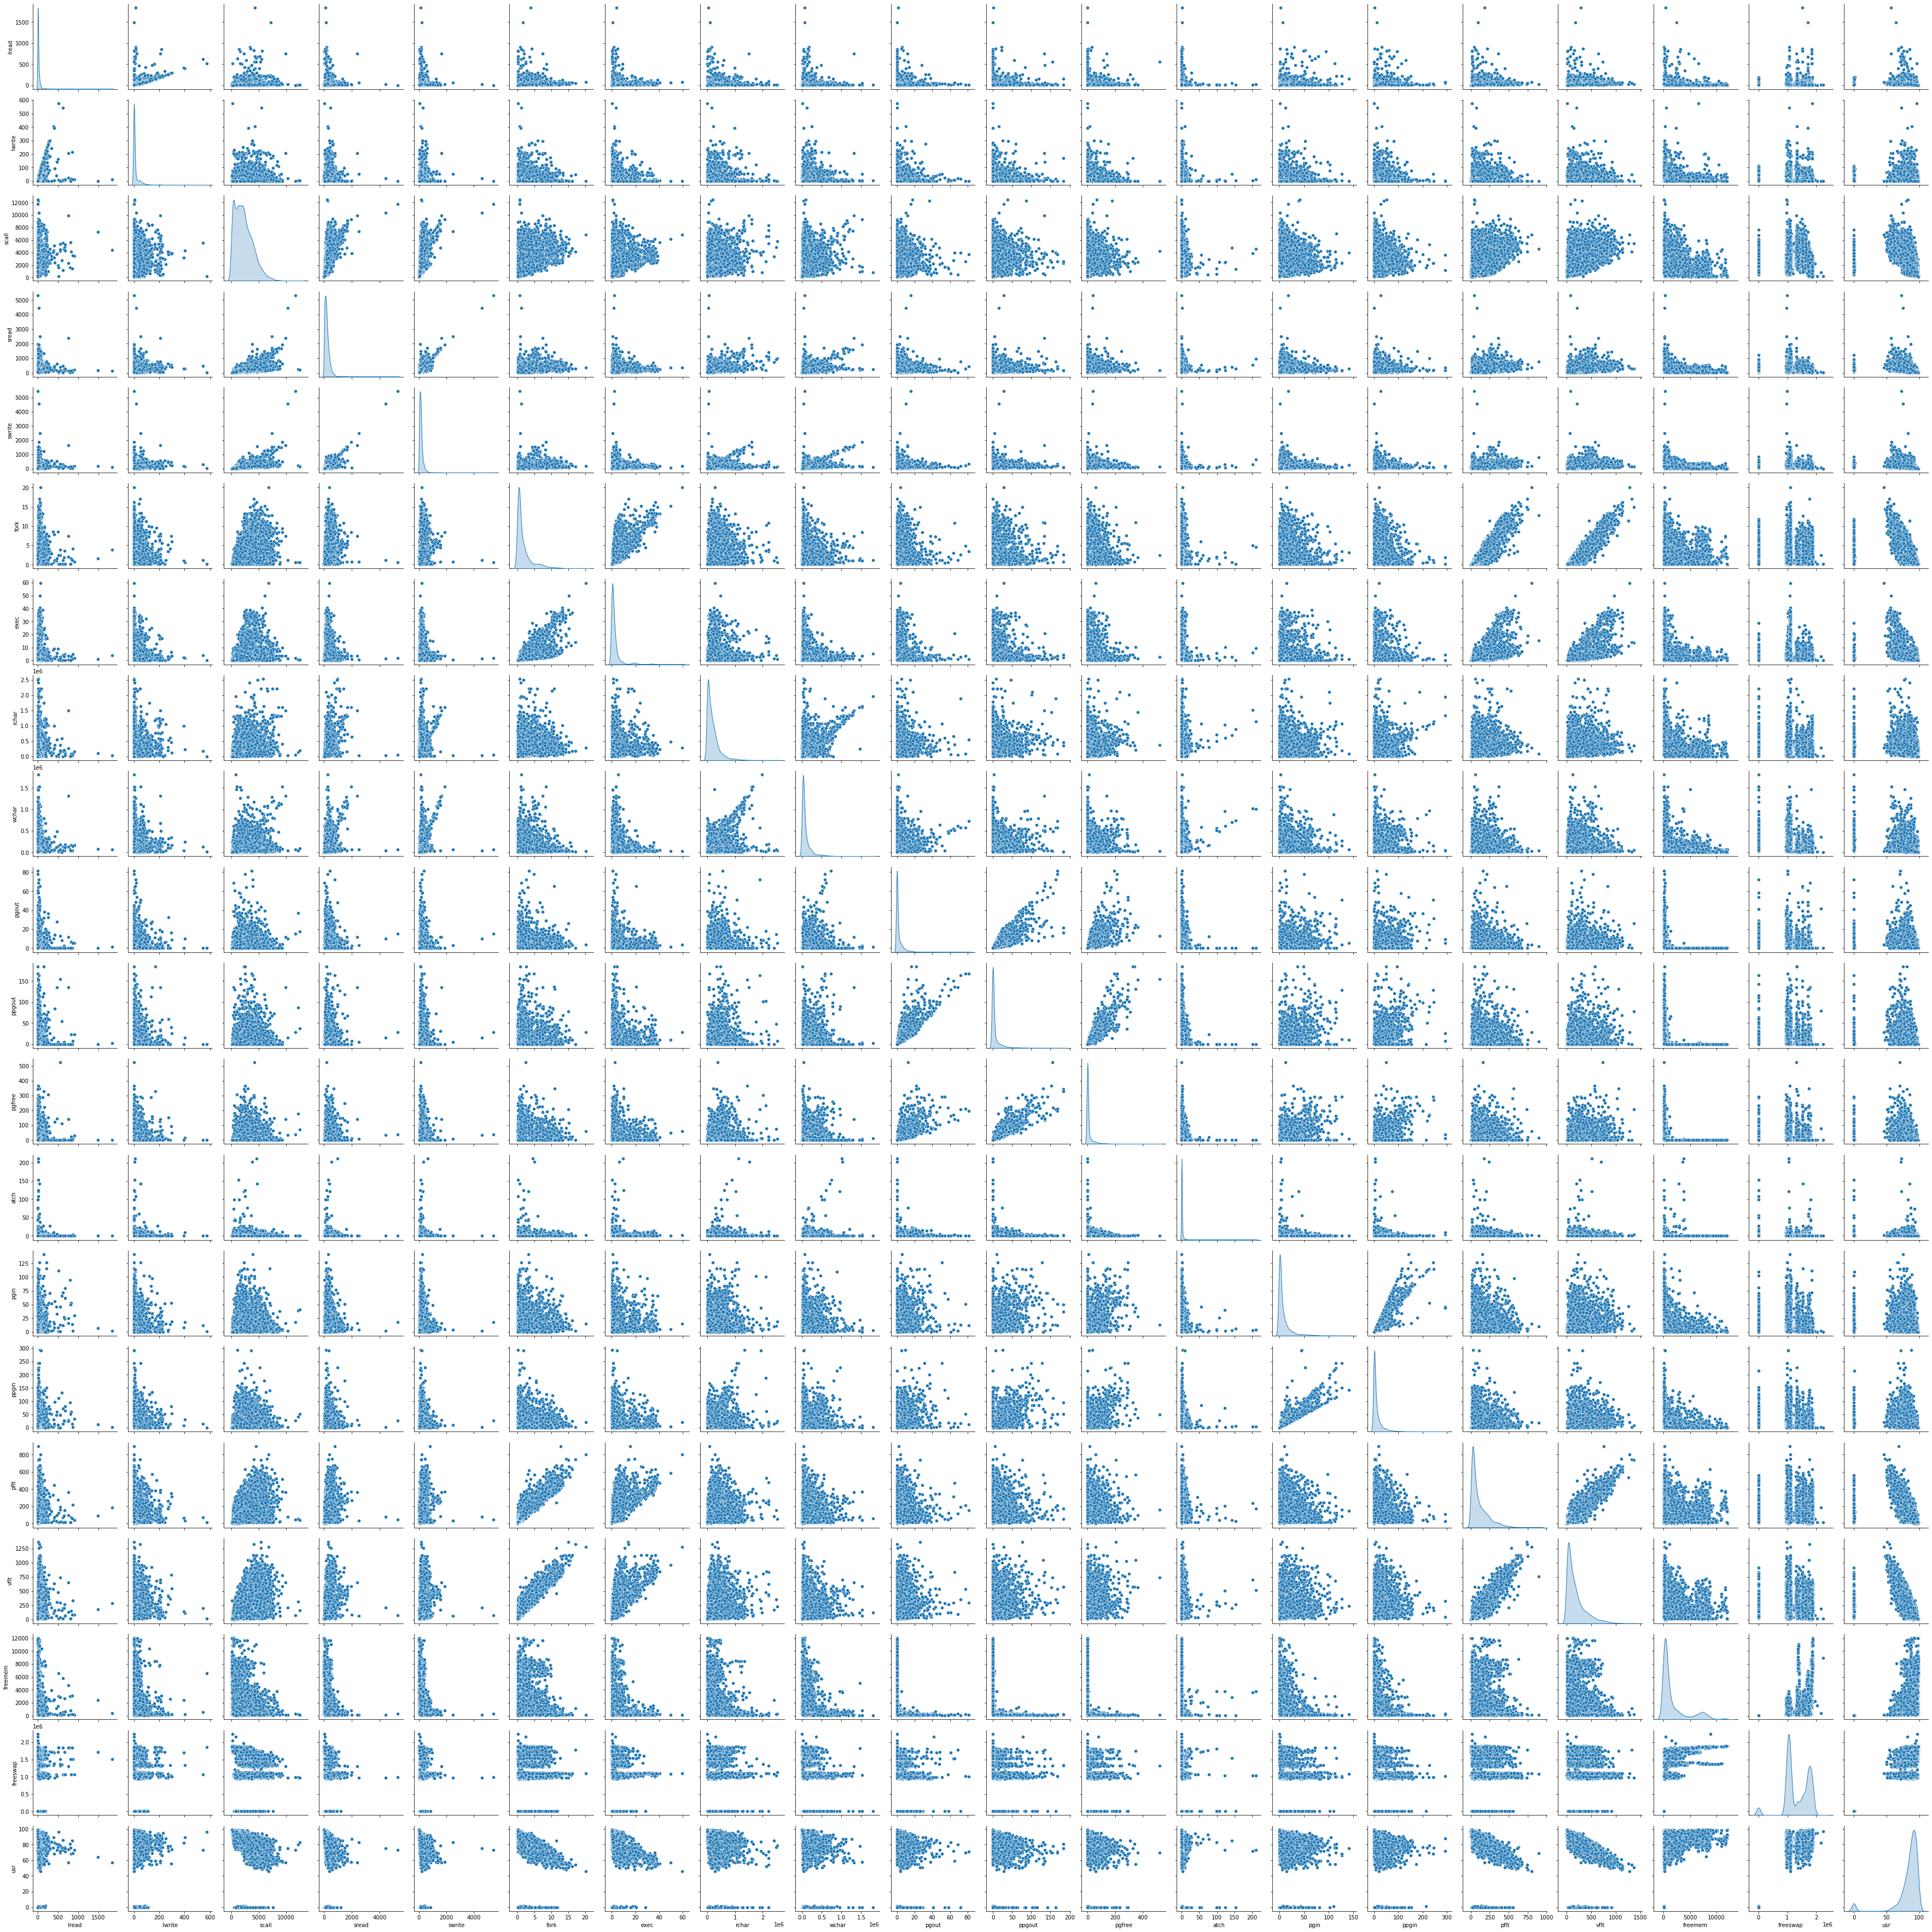

In [15]:
sns.pairplot(data=comp, diag_kind='kde')

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [16]:
comp.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [17]:
comp.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [18]:
comp['rchar'].fillna(comp['rchar'].median(),inplace=True)
comp['wchar'].fillna(comp['wchar'].median(),inplace=True)

In [19]:
comp.describe().T

count          mean            std     min         25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.00        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.00        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.00     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.00      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.00      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.40        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.20        1.2   
rchar     8192.0  1.964728e+05  238446.012054   278.0    34860.50   125473.5   
wchar     8192.0  9.581275e+04  140728.464118  1498.0    22977.75    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.00        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.00        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.00        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.00        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.60        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.60        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.00       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.40      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.00      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.50  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.00       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      265394.750  2526649.00  
wchar      106037.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [20]:
comp.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [21]:
Total_1 = (comp['lread']==0).sum()
print('Total number of zeros in lread column are=',Total_1)

Total_2 = (comp['lwrite']==0).sum()
print('Total number of zeros in lwrite column are=',Total_2)

Total_3 = (comp['scall']==0).sum()
print('Total number of zeros in scall column are=',Total_3)

Total_4 = (comp['sread']==0).sum()
print('Total number of zeros in sread column are=',Total_4)

Total_5 = (comp['swrite']==0).sum()
print('Total number of zeros in swrite column are=',Total_5)

Total_6 = (comp['fork']==0).sum()
print('Total number of zeros in fork column are=',Total_6)

Total_7 = (comp['exec']==0).sum()
print('Total number of zeros in exec column are=',Total_7)

Total_8 = (comp['rchar']==0).sum()
print('Total number of zeros in rchar column are=',Total_8)

Total_9 = (comp['wchar']==0).sum()
print('Total number of zeros in wchar column are=',Total_9)

Total_10 = (comp['pgout']==0).sum()
print('Total number of zeros in pgout column are=',Total_10)

Total_11 = (comp['ppgout']==0).sum()
print('Total number of zeros in ppgout column are=',Total_11)

Total_12 = (comp['pgfree']==0).sum()
print('Total number of zeros in pgfree column are=',Total_12)

Total_13 = (comp['atch']==0).sum()
print('Total number of zeros in atch column are=',Total_13)

Total_14 = (comp['atch']==0).sum()
print('Total number of zeros in atch column are=',Total_13)

Total_13 = (comp['atch']==0).sum()
print('Total number of zeros in atch column are=',Total_13)

Total_13 = (comp['atch']==0).sum()
print('Total number of zeros in atch column are=',Total_13)

Total_13 = (comp['atch']==0).sum()
print('Total number of zeros in atch column are=',Total_13)

Total_13 = (comp['atch']==0).sum()
print('Total number of zeros in atch column are=',Total_13)

Total_13 = (comp['atch']==0).sum()
print('Total number of zeros in atch column are=',Total_13)

Total_13 = (comp['atch']==0).sum()
print('Total number of zeros in atch column are=',Total_13)

Total_13 = (comp['atch']==0).sum()
print('Total number of zeros in atch column are=',Total_13)

Total_13 = (comp['atch']==0).sum()
print('Total number of zeros in atch column are=',Total_13)

Total_13 = (comp['atch']==0).sum()
print('Total number of zeros in atch column are=',Total_13)

Total number of zeros in lread column are= 675
Total number of zeros in lwrite column are= 2684
Total number of zeros in scall column are= 0
Total number of zeros in sread column are= 0
Total number of zeros in swrite column are= 0
Total number of zeros in fork column are= 21
Total number of zeros in exec column are= 21
Total number of zeros in rchar column are= 0
Total number of zeros in wchar column are= 0
Total number of zeros in pgout column are= 4878
Total number of zeros in ppgout column are= 4878
Total number of zeros in pgfree column are= 4869
Total number of zeros in atch column are= 4575
Total number of zeros in atch column are= 4575
Total number of zeros in atch column are= 4575
Total number of zeros in atch column are= 4575
Total number of zeros in atch column are= 4575
Total number of zeros in atch column are= 4575
Total number of zeros in atch column are= 4575
Total number of zeros in atch column are= 4575
Total number of zeros in atch column are= 4575
Total number of zer

#### We can see that previously columns were having null values so we imputed using median.
#### For variable 'rchar' had 8088 entries and 'wchar' had 8177 entries from 8192 total entries. now after imputation we can see that the values have changed which is 8192 entries.

## Checking Outliers.

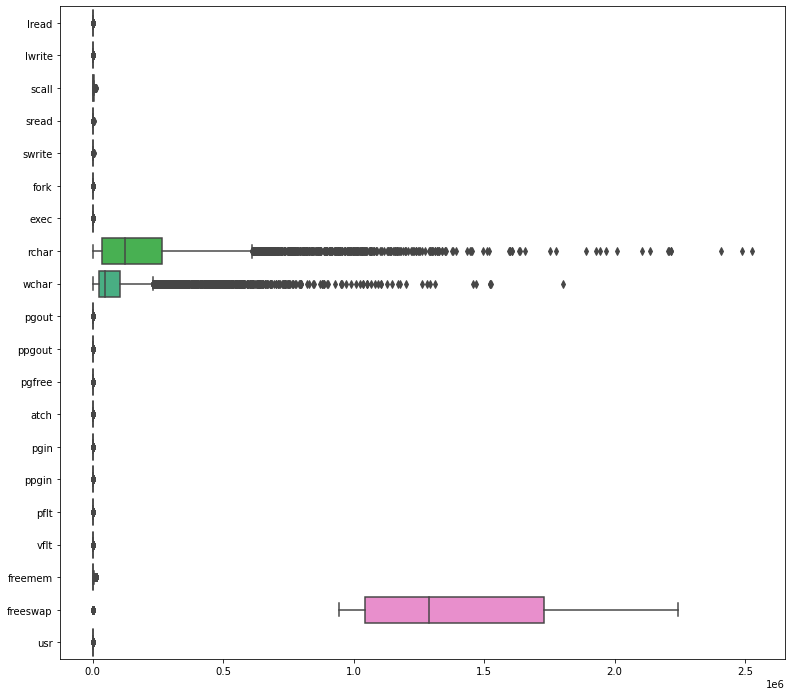

In [22]:
plt.figure(figsize=(13,12))
sns.boxplot(data = comp, orient ='h');

## Checking Duplicates

In [23]:
comp.duplicated().sum()

0

In [24]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  atch      8192 non-null   float64
 13  pgin      8192 non-null   float64
 14  ppgin     8192 non-null   float64
 15  pflt      8192 non-null   float64
 16  vflt      8192 non-null   float64
 17  runqsz    8192 non-null   object 
 18  freemem   8192 non-null   int64  
 19  freeswap  8192 non-null   int64  
 20  usr       8192 non-null   int6

## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [25]:
comp.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgfree  atch  pgin  ppgin    pflt    vflt         runqsz freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound    4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound    7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound     702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound    7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound     633   

   freeswap  usr  
0   1730946   95  
1   1869002   97  
2   1021237   87  
3   1863704   98  
4   1760253   90  

[5 rows x 21 columns]

In [26]:
comp['runqsz'] = pd.Categorical(comp['runqsz'])
comp['runqsz'].value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

In [27]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   lread     8192 non-null   int64   
 1   lwrite    8192 non-null   int64   
 2   scall     8192 non-null   int64   
 3   sread     8192 non-null   int64   
 4   swrite    8192 non-null   int64   
 5   fork      8192 non-null   float64 
 6   exec      8192 non-null   float64 
 7   rchar     8192 non-null   float64 
 8   wchar     8192 non-null   float64 
 9   pgout     8192 non-null   float64 
 10  ppgout    8192 non-null   float64 
 11  pgfree    8192 non-null   float64 
 12  atch      8192 non-null   float64 
 13  pgin      8192 non-null   float64 
 14  ppgin     8192 non-null   float64 
 15  pflt      8192 non-null   float64 
 16  vflt      8192 non-null   float64 
 17  runqsz    8192 non-null   category
 18  freemem   8192 non-null   int64   
 19  freeswap  8192 non-null   int64   
 20  usr     

### We have converted 'runqsv' column from 'object' to 'categorical' variable.

## By using 'One-Hot Encoding'

In [28]:
comp_dummy = pd.get_dummies(comp, drop_first=True)

In [29]:
comp_dummy.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgfree  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   95   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   97   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   87   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   98   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 21 columns]

### By using 'One-Hot Encoding' we have converted 'runqsz' variable from categorical to numerical variable. In above data the values after changing are 0 and 1.
### If runqsv=1 then it means Not_CPU_Bound.
### If runqsv=0 then it means CPU_Bound.

In [30]:
comp_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lread                 8192 non-null   int64  
 1   lwrite                8192 non-null   int64  
 2   scall                 8192 non-null   int64  
 3   sread                 8192 non-null   int64  
 4   swrite                8192 non-null   int64  
 5   fork                  8192 non-null   float64
 6   exec                  8192 non-null   float64
 7   rchar                 8192 non-null   float64
 8   wchar                 8192 non-null   float64
 9   pgout                 8192 non-null   float64
 10  ppgout                8192 non-null   float64
 11  pgfree                8192 non-null   float64
 12  atch                  8192 non-null   float64
 13  pgin                  8192 non-null   float64
 14  ppgin                 8192 non-null   float64
 15  pflt                 

### Split the data into Train and Test.

In [31]:
X = comp_dummy[['lread','lwrite','scall','sread','swrite','fork','exec','rchar','wchar','pgout','ppgout','pgfree','atch','pgin','ppgin','pflt','vflt','freemem','freeswap','runqsz_Not_CPU_Bound']].copy()
Y = comp_dummy['usr']

In [32]:
X_train, X_test,Y_train, Y_test =train_test_split(X,Y,test_size=0.3, random_state=1)

In [33]:
print('Shape of X Train Data : ',X_train.shape)
print('Shape of X Test Data : ',X_test.shape)
print('Shape of Y Train Data : ',Y_train.shape)
print('Shape of Y Test Data : ',Y_test.shape)

Shape of X Train Data :  (5734, 20)
Shape of X Test Data :  (2458, 20)
Shape of Y Train Data :  (5734,)
Shape of Y Test Data :  (2458,)


## StatsModel to check the performance of the variables.

In [34]:
import statsmodels.formula.api as SM

In [35]:
formula_MLR_1 = 'usr~lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgfree+atch+pgin+ppgin+pflt+vflt+freemem+freeswap+runqsz_Not_CPU_Bound'

### Model 1

In [36]:
model_MLR_1 = SM.ols(formula=formula_MLR_1, data=comp_dummy).fit()
model_MLR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     725.8
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:27:47   Log-Likelihood:                -31300.
No. Observations:                8192   AIC:                         6.264e+04
Df Residuals:                    8171   BIC:                         6.279e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               42.8493      0.623     68.739      0.000      41.627      44.071
lread                   -0.0200      0.003     -7.167      0.000      -0.026      -0.015
lwrite                   0.0072      0.005      1.477      0.140      -0.002       0.017
scall                    0.0010      0.000      8.767      0.000       0.001       0.001
sread                    0.0001      0.002      0.078      0.938      -0.003       0.003
swrite                  -0.0018      0.002     -1.007      0.314      -0.005       0.002
fork                    -1.8853      0.209     -9.027      0.000      -2.295      -1.476
exec                    -0.0394      0.041     -0.960      0.337      -0.120       0.041
rchar                -3.656e-06    7.2e-07     -5.081      0.000   -5.07e-06   -2.25e-06
wchar                -1.079e-05    1.1e-06     -9.852      0.000   -1.29e-05   -8.64e-06
pgout                   -0.2394      0.052     -4.577      0.000      -0.342      -0.137
ppgout                   0.1224      0.031      3.965      0.000       0.062       0.183
pgfree                  -0.0572      0.011     -5.316      0.000      -0.078      -0.036
atch                    -0.0398      0.022     -1.780      0.075      -0.084       0.004
pgin                     0.0542      0.024      2.229      0.026       0.007       0.102
ppgin                   -0.0358      0.016     -2.298      0.022      -0.066      -0.005
pflt                    -0.0401      0.004    -11.187      0.000      -0.047      -0.033
vflt                     0.0228      0.003      8.206      0.000       0.017       0.028
freemem                 -0.0017   6.37e-05    -26.116      0.000      -0.002      -0.002
freeswap              3.324e-05   3.82e-07     87.023      0.000    3.25e-05     3.4e-05
runqsz_Not_CPU_Bound     7.9546      0.258     30.846      0.000       7.449       8.460
==============================================================================
Omnibus:                     1929.992   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5368.205
Skew:                          -1.245   Prob(JB):                         0.00
Kurtosis:                       6.087   Cond. No.                     7.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [38]:
vif_cal(input_data=comp_dummy[['lread','lwrite','scall','sread','swrite','fork','exec','rchar','wchar','pgout','ppgout','pgfree','atch','pgin','ppgin','pflt','vflt','freemem','freeswap','runqsz_Not_CPU_Bound']])

lread  VIF =  1.49
lwrite  VIF =  1.43
scall  VIF =  2.48
sread  VIF =  6.85
swrite  VIF =  5.39
fork  VIF =  17.97
exec  VIF =  3.07
rchar  VIF =  1.97
wchar  VIF =  1.59
pgout  VIF =  5.16
ppgout  VIF =  14.78
pgfree  VIF =  8.14
atch  VIF =  1.09
pgin  VIF =  7.63
ppgin  VIF =  8.09
pflt  VIF =  11.29
vflt  VIF =  18.83
freemem  VIF =  1.67
freeswap  VIF =  1.74
runqsz_Not_CPU_Bound  VIF =  1.11


### Model 2

In [39]:
formula_MLR_2 = 'usr~lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgfree+atch+pgin+ppgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [40]:
model_MLR_2 = SM.ols(formula=formula_MLR_2, data=comp_dummy).fit()
model_MLR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     754.3
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:27:48   Log-Likelihood:                -31333.
No. Observations:                8192   AIC:                         6.271e+04
Df Residuals:                    8172   BIC:                         6.285e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               44.0004      0.610     72.151      0.000      42.805      45.196
lread                   -0.0209      0.003     -7.448      0.000      -0.026      -0.015
lwrite                   0.0100      0.005      2.038      0.042       0.000       0.020
scall                    0.0012      0.000      9.946      0.000       0.001       0.001
sread                    0.0012      0.002      0.762      0.446      -0.002       0.004
swrite                  -0.0030      0.002     -1.719      0.086      -0.007       0.000
fork                    -0.9223      0.173     -5.317      0.000      -1.262      -0.582
exec                    -0.0618      0.041     -1.503      0.133      -0.142       0.019
rchar                -3.211e-06    7.2e-07     -4.458      0.000   -4.62e-06    -1.8e-06
wchar                -1.154e-05    1.1e-06    -10.530      0.000   -1.37e-05   -9.39e-06
pgout                   -0.2559      0.052     -4.876      0.000      -0.359      -0.153
ppgout                   0.1201      0.031      3.875      0.000       0.059       0.181
pgfree                  -0.0435      0.011     -4.074      0.000      -0.064      -0.023
atch                    -0.0156      0.022     -0.703      0.482      -0.059       0.028
pgin                     0.1004      0.024      4.223      0.000       0.054       0.147
ppgin                   -0.0518      0.016     -3.333      0.001      -0.082      -0.021
pflt                    -0.0261      0.003     -8.242      0.000      -0.032      -0.020
freemem                 -0.0017   6.39e-05    -25.983      0.000      -0.002      -0.002
freeswap              3.253e-05   3.74e-07     87.070      0.000    3.18e-05    3.33e-05
runqsz_Not_CPU_Bound     7.9621      0.259     30.750      0.000       7.455       8.470
==============================================================================
Omnibus:                     2021.091   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5807.126
Skew:                          -1.290   Prob(JB):                         0.00
Kurtosis:                       6.218   Cond. No.                     7.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
vif_cal(input_data=comp_dummy[['lread','lwrite','scall','sread','swrite','fork','exec','rchar','wchar','pgout','ppgout','pgfree','atch','pgin','ppgin','pflt','freemem','freeswap','runqsz_Not_CPU_Bound']])

lread  VIF =  1.49
lwrite  VIF =  1.43
scall  VIF =  2.43
sread  VIF =  6.81
swrite  VIF =  5.35
fork  VIF =  12.29
exec  VIF =  3.05
rchar  VIF =  1.96
wchar  VIF =  1.58
pgout  VIF =  5.16
ppgout  VIF =  14.78
pgfree  VIF =  7.94
atch  VIF =  1.07
pgin  VIF =  7.23
ppgin  VIF =  7.96
pflt  VIF =  8.72
freemem  VIF =  1.67
freeswap  VIF =  1.65
runqsz_Not_CPU_Bound  VIF =  1.11


### Model 3 without 'ppgout' variable.

In [42]:
formula_MLR_3 = 'usr~lread+lwrite+scall+sread+swrite+exec+rchar+wchar+pgout+pgfree+atch+pgin+ppgin+pflt+fork+freemem+freeswap+runqsz_Not_CPU_Bound'

In [43]:
model_MLR_3 = SM.ols(formula=formula_MLR_3, data=comp_dummy).fit()
model_MLR_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     794.0
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:27:48   Log-Likelihood:                -31341.
No. Observations:                8192   AIC:                         6.272e+04
Df Residuals:                    8173   BIC:                         6.285e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               43.7704      0.607     72.055      0.000      42.580      44.961
lread                   -0.0199      0.003     -7.117      0.000      -0.025      -0.014
lwrite                   0.0098      0.005      1.990      0.047       0.000       0.019
scall                    0.0012      0.000      9.852      0.000       0.001       0.001
sread                    0.0017      0.002      1.081      0.280      -0.001       0.005
swrite                  -0.0034      0.002     -1.925      0.054      -0.007    6.31e-05
exec                    -0.0539      0.041     -1.312      0.190      -0.135       0.027
rchar                -3.242e-06   7.21e-07     -4.496      0.000   -4.66e-06   -1.83e-06
wchar                -1.138e-05    1.1e-06    -10.387      0.000   -1.35e-05   -9.24e-06
pgout                   -0.1040      0.035     -2.978      0.003      -0.172      -0.036
pgfree                  -0.0103      0.006     -1.613      0.107      -0.023       0.002
atch                    -0.0201      0.022     -0.903      0.367      -0.064       0.024
pgin                     0.0957      0.024      4.030      0.000       0.049       0.142
ppgin                   -0.0486      0.016     -3.128      0.002      -0.079      -0.018
pflt                    -0.0264      0.003     -8.345      0.000      -0.033      -0.020
fork                    -0.9166      0.174     -5.280      0.000      -1.257      -0.576
freemem                 -0.0017    6.4e-05    -25.930      0.000      -0.002      -0.002
freeswap              3.264e-05   3.73e-07     87.570      0.000    3.19e-05    3.34e-05
runqsz_Not_CPU_Bound     7.9689      0.259     30.751      0.000       7.461       8.477
==============================================================================
Omnibus:                     2017.129   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5769.385
Skew:                          -1.289   Prob(JB):                         0.00
Kurtosis:                       6.202   Cond. No.                     7.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
vif_cal(input_data=comp_dummy[['lread','lwrite','scall','sread','swrite','fork','exec','rchar','wchar','pgout','pgfree','atch','pgin','ppgin','pflt','freemem','freeswap','runqsz_Not_CPU_Bound']])

lread  VIF =  1.48
lwrite  VIF =  1.43
scall  VIF =  2.43
sread  VIF =  6.76
swrite  VIF =  5.34
fork  VIF =  12.29
exec  VIF =  3.05
rchar  VIF =  1.96
wchar  VIF =  1.58
pgout  VIF =  2.28
pgfree  VIF =  2.82
atch  VIF =  1.07
pgin  VIF =  7.21
ppgin  VIF =  7.94
pflt  VIF =  8.71
freemem  VIF =  1.67
freeswap  VIF =  1.64
runqsz_Not_CPU_Bound  VIF =  1.11


### Model 4 without 'fork' variable.

In [45]:
formula_MLR_4 = 'usr~lread+lwrite+scall+sread+swrite+exec+rchar+wchar+pgout+atch+pgin+ppgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [46]:
model_MLR_4 = SM.ols(formula=formula_MLR_4, data=comp_dummy).fit()
model_MLR_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     888.2
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:27:48   Log-Likelihood:                -31356.
No. Observations:                8192   AIC:                         6.275e+04
Df Residuals:                    8175   BIC:                         6.287e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               44.1152      0.605     72.918      0.000      42.929      45.301
lread                   -0.0208      0.003     -7.441      0.000      -0.026      -0.015
lwrite                   0.0112      0.005      2.277      0.023       0.002       0.021
scall                    0.0012      0.000     10.419      0.000       0.001       0.001
sread                    0.0018      0.002      1.110      0.267      -0.001       0.005
swrite                  -0.0049      0.002     -2.784      0.005      -0.008      -0.001
exec                    -0.1871      0.033     -5.753      0.000      -0.251      -0.123
rchar                -3.428e-06   7.21e-07     -4.754      0.000   -4.84e-06   -2.01e-06
wchar                -1.087e-05   1.09e-06     -9.938      0.000    -1.3e-05   -8.72e-06
pgout                   -0.1384      0.026     -5.229      0.000      -0.190      -0.087
atch                    -0.0172      0.022     -0.772      0.440      -0.061       0.026
pgin                     0.0982      0.024      4.138      0.000       0.052       0.145
ppgin                   -0.0528      0.015     -3.523      0.000      -0.082      -0.023
pflt                    -0.0408      0.002    -24.753      0.000      -0.044      -0.038
freemem                 -0.0017   6.41e-05    -25.860      0.000      -0.002      -0.002
freeswap              3.259e-05   3.73e-07     87.344      0.000    3.19e-05    3.33e-05
runqsz_Not_CPU_Bound     7.9503      0.260     30.629      0.000       7.441       8.459
==============================================================================
Omnibus:                     1993.571   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5670.968
Skew:                          -1.276   Prob(JB):                         0.00
Kurtosis:                       6.178   Cond. No.                     7.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
vif_cal(input_data=comp_dummy[['lread','lwrite','scall','sread','swrite','exec','rchar','wchar','pgout','pgfree','atch','pgin','ppgin','pflt','freemem','freeswap','runqsz_Not_CPU_Bound']])

lread  VIF =  1.47
lwrite  VIF =  1.42
scall  VIF =  2.41
sread  VIF =  6.76
swrite  VIF =  5.19
exec  VIF =  1.9
rchar  VIF =  1.96
wchar  VIF =  1.57
pgout  VIF =  2.28
pgfree  VIF =  2.82
atch  VIF =  1.07
pgin  VIF =  7.21
ppgin  VIF =  7.93
pflt  VIF =  2.36
freemem  VIF =  1.67
freeswap  VIF =  1.64
runqsz_Not_CPU_Bound  VIF =  1.11


### Model 5 without 'ppgin' variable.

In [48]:
formula_MLR_5 = 'usr~lread+lwrite+scall+sread+swrite+exec+rchar+wchar+pgout+atch+pgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [49]:
model_MLR_5 = SM.ols(formula=formula_MLR_5, data=comp_dummy).fit()
model_MLR_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     945.3
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:27:49   Log-Likelihood:                -31362.
No. Observations:                8192   AIC:                         6.276e+04
Df Residuals:                    8176   BIC:                         6.287e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               44.2142      0.605     73.110      0.000      43.029      45.400
lread                   -0.0204      0.003     -7.296      0.000      -0.026      -0.015
lwrite                   0.0108      0.005      2.195      0.028       0.001       0.020
scall                    0.0012      0.000     10.503      0.000       0.001       0.001
sread                    0.0018      0.002      1.123      0.262      -0.001       0.005
swrite                  -0.0049      0.002     -2.797      0.005      -0.008      -0.001
exec                    -0.1841      0.033     -5.658      0.000      -0.248      -0.120
rchar                -3.875e-06    7.1e-07     -5.454      0.000   -5.27e-06   -2.48e-06
wchar                -1.085e-05   1.09e-06     -9.915      0.000    -1.3e-05   -8.71e-06
pgout                   -0.1535      0.026     -5.872      0.000      -0.205      -0.102
atch                    -0.0145      0.022     -0.650      0.515      -0.058       0.029
pgin                     0.0228      0.010      2.221      0.026       0.003       0.043
pflt                    -0.0406      0.002    -24.611      0.000      -0.044      -0.037
freemem                 -0.0017   6.41e-05    -25.825      0.000      -0.002      -0.002
freeswap              3.253e-05   3.73e-07     87.212      0.000    3.18e-05    3.33e-05
runqsz_Not_CPU_Bound     7.9396      0.260     30.568      0.000       7.430       8.449
==============================================================================
Omnibus:                     1997.694   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5683.105
Skew:                          -1.279   Prob(JB):                         0.00
Kurtosis:                       6.179   Cond. No.                     7.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
vif_cal(input_data=comp_dummy[['lread','lwrite','scall','sread','swrite','exec','rchar','wchar','pgout','pgfree','atch','pgin','pflt','freemem','freeswap','runqsz_Not_CPU_Bound']])

lread  VIF =  1.47
lwrite  VIF =  1.42
scall  VIF =  2.41
sread  VIF =  6.76
swrite  VIF =  5.19
exec  VIF =  1.9
rchar  VIF =  1.91
wchar  VIF =  1.57
pgout  VIF =  2.27
pgfree  VIF =  2.62
atch  VIF =  1.07
pgin  VIF =  1.54
pflt  VIF =  2.36
freemem  VIF =  1.67
freeswap  VIF =  1.64
runqsz_Not_CPU_Bound  VIF =  1.11


### Model 6 without 'sread' variable.

In [51]:
formula_MLR_6 = 'usr~lread+lwrite+scall+swrite+exec+rchar+wchar+pgout+atch+pgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [52]:
model_MLR_6 = SM.ols(formula=formula_MLR_6, data=comp_dummy).fit()
model_MLR_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1013.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:27:49   Log-Likelihood:                -31363.
No. Observations:                8192   AIC:                         6.276e+04
Df Residuals:                    8177   BIC:                         6.286e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               44.2453      0.604     73.237      0.000      43.061      45.430
lread                   -0.0205      0.003     -7.342      0.000      -0.026      -0.015
lwrite                   0.0110      0.005      2.233      0.026       0.001       0.021
scall                    0.0013      0.000     11.407      0.000       0.001       0.001
swrite                  -0.0033      0.001     -3.103      0.002      -0.005      -0.001
exec                    -0.1863      0.032     -5.735      0.000      -0.250      -0.123
rchar                -3.555e-06   6.51e-07     -5.463      0.000   -4.83e-06   -2.28e-06
wchar                -1.095e-05   1.09e-06    -10.032      0.000   -1.31e-05   -8.81e-06
pgout                   -0.1529      0.026     -5.851      0.000      -0.204      -0.102
atch                    -0.0148      0.022     -0.666      0.505      -0.058       0.029
pgin                     0.0226      0.010      2.200      0.028       0.002       0.043
pflt                    -0.0405      0.002    -24.596      0.000      -0.044      -0.037
freemem                 -0.0017   6.41e-05    -25.819      0.000      -0.002      -0.002
freeswap               3.25e-05   3.72e-07     87.375      0.000    3.18e-05    3.32e-05
runqsz_Not_CPU_Bound     7.9439      0.260     30.588      0.000       7.435       8.453
==============================================================================
Omnibus:                     2000.833   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5700.285
Skew:                          -1.280   Prob(JB):                         0.00
Kurtosis:                       6.185   Cond. No.                     7.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
vif_cal(input_data=comp_dummy[['lread','lwrite','scall','swrite','exec','rchar','wchar','pgout','pgfree','atch','pgin','pflt','freemem','freeswap','runqsz_Not_CPU_Bound']])

lread  VIF =  1.47
lwrite  VIF =  1.42
scall  VIF =  2.18
swrite  VIF =  1.97
exec  VIF =  1.89
rchar  VIF =  1.61
wchar  VIF =  1.56
pgout  VIF =  2.27
pgfree  VIF =  2.61
atch  VIF =  1.07
pgin  VIF =  1.54
pflt  VIF =  2.34
freemem  VIF =  1.67
freeswap  VIF =  1.63
runqsz_Not_CPU_Bound  VIF =  1.11


In [54]:
model_MLR_6.pvalues

Intercept                0.000000e+00
lread                    2.312950e-13
lwrite                   2.558362e-02
scall                    6.463785e-30
swrite                   1.922923e-03
exec                     1.010266e-08
rchar                    4.812186e-08
wchar                    1.503870e-23
pgout                    5.080742e-09
atch                     5.054674e-01
pgin                     2.785136e-02
pflt                    6.164286e-129
freemem                 2.262842e-141
freeswap                 0.000000e+00
runqsz_Not_CPU_Bound    1.206506e-194
dtype: float64

In [55]:
print('For the sixth MLR model:','\n')

print('Rsquared',model_MLR_6.rsquared)
print('Adjusted Rsquared',model_MLR_6.rsquared_adj)

For the sixth MLR model: 

Rsquared 0.634221604112309
Adjusted Rsquared 0.6335953478395405


### Prediction using model 6.

In [56]:
model_MLR_6_pred = model_MLR_6.fittedvalues
model_MLR_6_pred

0        93.863732
1       100.267549
2        79.085565
3        99.707202
4       106.390464
           ...    
8187     68.959256
8188     80.950705
8189     82.360372
8190     78.813473
8191     96.123987
Length: 8192, dtype: float64

### Scatterplot of Dependent variable(usr) and predicted values of model.

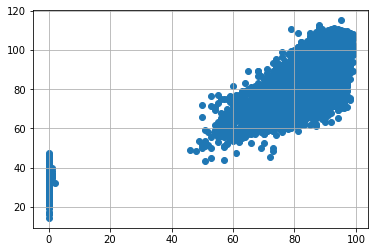

In [57]:
plt.scatter(comp_dummy['usr'],model_MLR_6_pred)
plt.grid();

### Distribution plot of Dependent variable (usr) and fitted values in the model.

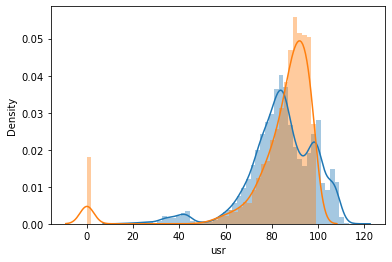

In [58]:
sns.distplot(model_MLR_6.fittedvalues)
sns.distplot(comp_dummy['usr']);

### Linear Relationship between dependent and independent variables.

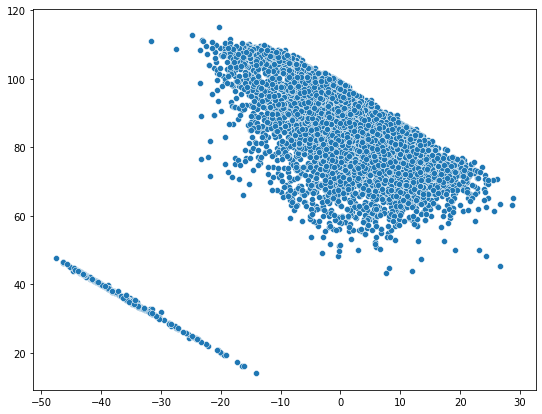

In [59]:
plt.figure(figsize=(9,7));
sns.scatterplot(model_MLR_5.resid,model_MLR_6.fittedvalues);

### Distribution Plot and Boxplot of the Residuals.

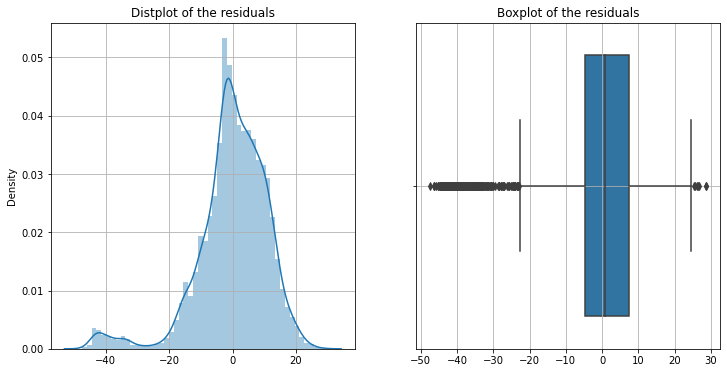

In [60]:
f,a =  plt.subplots(1,2,sharex=False,sharey=False,squeeze=False,figsize=(12,6))


plot_0 = sns.distplot(model_MLR_6.resid,ax=a[0][0])
a[0][0].set_title('Distplot of the residuals')
a[0][0].grid()

plot_1 = sns.boxplot(model_MLR_6.resid,orient='v',ax=a[0][1])
a[0][1].set_title('Boxplot of the residuals')
a[0][1].grid();
plot_1;

## Conclusion.

### usr=( 44.2453) - ( lread x 0.0205) + ( Iwrite x 0.0110) + ( scall x 0.0013 ) - ( swrite x 0.0033) - ( exec x 0.1863 ) - ( rchar x 3.555e-06 ) - ( wchar x 1.095e-05 ) - ( pgout x 0.1529 ) - ( atch x 0.0148 ) + ( pgin x 0.0226 ) - (pflt x 0.0405 ) - (freemen x 0.0017) + ( freeswap x 3.25e-05) + ( runqsv.Not_CPU_Bound x 7.943)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()

### Using only Model 6 variables to build the model on the training data and predict on the training as well as test data.

In [63]:
model_6 = lr.fit(X_train[['lread','lwrite','scall','sread','swrite','exec','rchar','wchar','pgout','atch','pgin','ppgin','pflt','freemem','freeswap','runqsz_Not_CPU_Bound']],Y_train)

In [64]:
#Training Data Prediction

model_6_pred_train = model_6.predict(X_train[['lread','lwrite','scall','sread','swrite','exec','rchar','wchar','pgout','atch','pgin','ppgin','pflt','freemem','freeswap','runqsz_Not_CPU_Bound']])

In [65]:
#Testing Data Prediction
model_6_pred_test = model_6.predict(X_test[['lread','lwrite','scall','sread','swrite','exec','rchar','wchar','pgout','atch','pgin','ppgin','pflt','freemem','freeswap','runqsz_Not_CPU_Bound']])

### MSE check for the built model.

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
print('Training Data MSE of model_6:',mean_squared_error(Y_train,model_6_pred_train,squared=True))
print('Test Data MSE of model_6:',mean_squared_error(Y_test,model_6_pred_test,squared=True))

Training Data MSE of model_6: 118.35771615579372
Test Data MSE of model_6: 136.93912660218894


### RMSE check for the built model.

In [68]:
print('Training Data RMSE of model_6:',mean_squared_error(Y_train,model_6_pred_train,squared=False))
print('Test Data RMSE of model_6:',mean_squared_error(Y_test,model_6_pred_test,squared=False))

Training Data RMSE of model_6: 10.879233252200898
Test Data RMSE of model_6: 11.702099239118978


### Scatterplot for the Predictions.

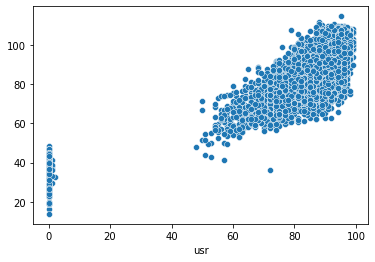

In [69]:
# Training Data
sns.scatterplot(Y_train,model_6_pred_train);

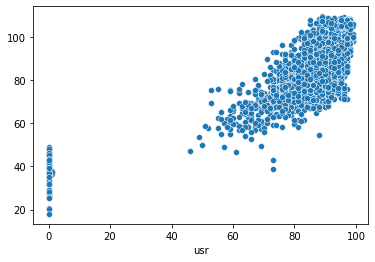

In [70]:
# Testing Data
sns.scatterplot(Y_test,model_6_pred_test);